In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [82]:
df = pd.read_csv(r'prodata_refined.csv')

In [4]:
#consider stewie2k
df[df['Player'] == 'Stewie2k']

,Team,Player,Game,Mouse,Mouse HZ,DPI,Sensitivity,eDPI,Monitor,Monitor HZ,GPU,Resolution,Aspect Ratio,Mousepad,Keyboard,Headset
2,EG (S),Stewie2k,Counter Strike: Global Offensive,Logitech G Pro X Superlight Black,"1,000",400,2.00,800,BenQ XL2546K,360.0,RTX 2080 Super,1024x768,4:3,SteelSeries QcK Heavy,Logitech G512,HyperX Cloud II
524,EG (S),Stewie2k,VALORANT,Logitech G Pro X Superlight Black,"1,000",400,0.61,244,Alienware AW2521H,360.0,RTX 2080 Ti,1920x1080,16:9,SteelSeries QcK Heavy,Logitech G512,HyperX Cloud II


-0.5


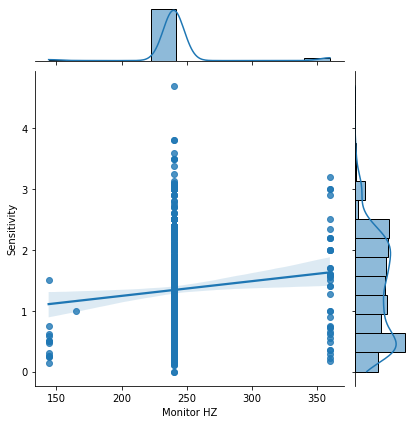

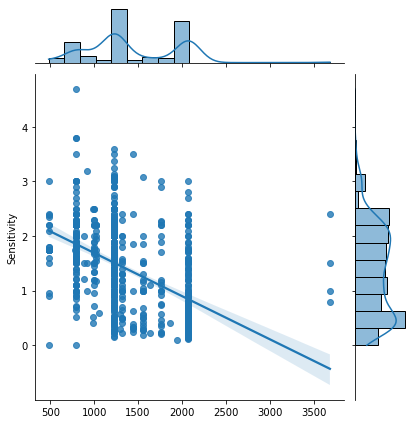

In [80]:
#analyzing trends
pix = []
count = 0
for i in df['Resolution']:
    r = i.split('x')
    num1 = float(r[0])
    num2 = float(r[1])
    count+=1
    asp = (num1*num2)/1000
    pix.append(asp)
df['Resolution'] = pix

sns.jointplot(x=df['Monitor HZ'], y=df['Sensitivity'], kind = 'reg')

sns.jointplot(x=pix, y=df['Sensitivity'], kind = 'reg')
print(round(df['Resolution'].corr(df['Sensitivity']),2))


In [87]:
df[df['Monitor HZ'] == 360]

,Team,Player,Game,Mouse,Mouse HZ,DPI,Sensitivity,eDPI,Monitor,Monitor HZ,GPU,Resolution,Aspect Ratio,Mousepad,Keyboard,Headset
0,Streamer,n0thing,Counter Strike: Global Offensive,Logitech G100s Custom,500,400,2.000,800,Alienware AW2521H,360.0,RTX 3090,1920x1080,16:09,SteelSeries QcK Heavy,HyperX Alloy Elite,Logitech G Pro X Wireless Headset SE
2,EG (S),Stewie2k,Counter Strike: Global Offensive,Logitech G Pro X Superlight Black,"1,000",400,2.000,800,BenQ XL2546K,360.0,RTX 2080 Super,1024x768,4:03,SteelSeries QcK Heavy,Logitech G512,HyperX Cloud II
12,Free Agent,dennis,Counter Strike: Global Offensive,Razer DeathAdder V3 Pro,"1,000",400,2.000,800,ASUS ROG Swift PG259QN,360.0,RTX 2080 Ti,1024x768,4:03,Razer Gigantus Elite,Razer Huntsman V2 TKL,Razer BlackShark V2 Pro
14,Free Agent,Lekr0,Counter Strike: Global Offensive,Logitech G Pro Wireless,"1,000",800,1.000,800,ASUS ROG Swift PG259QN,360.0,RTX 2080 Ti,1440x1080,4:03,Xtrfy XTP1 f0rest Edition,Xtrfy K2-RGB,Xtrfy H1
19,JANO Esports,allu,Counter Strike: Global Offensive,Logitech G Pro X Superlight Black,"1,000",400,3.000,"1,200",ASUS ROG Swift PG259QN,360.0,RTX 2080 Ti,1280x960,4:03,Logitech G640 ENCE Edition,Logitech G Pro Mechanical Keyboard,Logitech G Pro X Headset
24,Imperial,FalleN,Counter Strike: Global Offensive,Zowie EC1-A,"1,000",400,2.200,880,BenQ XL2546K,360.0,RTX 3080,1024x768,4:03,Fallen Fade,Fallen Ace,Fallen Morcego Vermelho
41,Liquid,EliGE,Counter Strike: Global Offensive,Logitech G Pro X Superlight Black,"1,000","1,600",0.740,"1,184",Alienware AW2521H,360.0,RTX 3080,1680x1050,16:10,Lethal Gaming Gear Saturn,Glorious GMMK Pro,Beyerdynamic DT 770 Pro
46,Streamer,ScreaM,Counter Strike: Global Offensive,FinalMouse Ultralight 2,500,400,2.350,940,Alienware AW2521H,360.0,RTX 3080,800x600,4:03,SteelSeries QcK Heavy,SteelSeries 6Gv2,Sennheiser GAME ZERO SE
51,UNGENTIUM,byali,Counter Strike: Global Offensive,Razer DeathAdder V3 Pro,"4,000",400,1.700,680,ASUS ROG Swift PG259QN,360.0,RTX 2080,1680x1050,16:10,Logitech G640,Xtrfy K4-RGB TKL,Sennheiser GAME ZERO
60,Liquid,NAF,Counter Strike: Global Offensive,Logitech G Pro X Superlight White,"1,000",400,1.600,640,Alienware AW2521H,360.0,GTX 1080 Ti,1280x960,4:03,SteelSeries QcK Heavy,Xtrfy K5 Compact RGB,Sennheiser GSP 600


In [99]:
mouse = df.groupby(['Mouse'])
m= pd.DataFrame(mouse['Mouse'].count())
m.rename(columns = {'Mouse':'In Use'},inplace = True)
m[m['In Use'] == m['In Use'].max()]

,In Use
Mouse,
Logitech G Pro X Superlight Black,108
